In [2]:
import datetime

import matplotlib as mat

import matplotlib.pyplot as plt
import matplotlib.colors as mpl_colors
import matplotlib.colorbar as mpl_colorbar

import netCDF4 as nc
import numpy as np
from salishsea_tools import geo_tools

import shutil

from salishsea_tools import viz_tools

from mpl_toolkits.axes_grid1 import make_axes_locatable


from matplotlib.backends.backend_agg import FigureCanvasAgg as fc



%matplotlib inline

plots = ("JUL 19", "JUL 26", "AUG 2", "AUG 9", "AUG 16", "AUG 23")

COL = 1

directory = "/home/gsgarbi/analysis-giorgio/project2/"

initial_depths = "45, 59, 77"

length = "4 days" #multiply trajectory length by 4/14

#reference: 14 days

ratio = 4/14

size = 40

fontsize = 40

mat.rcParams.update({'font.size': fontsize})

tfs = 36











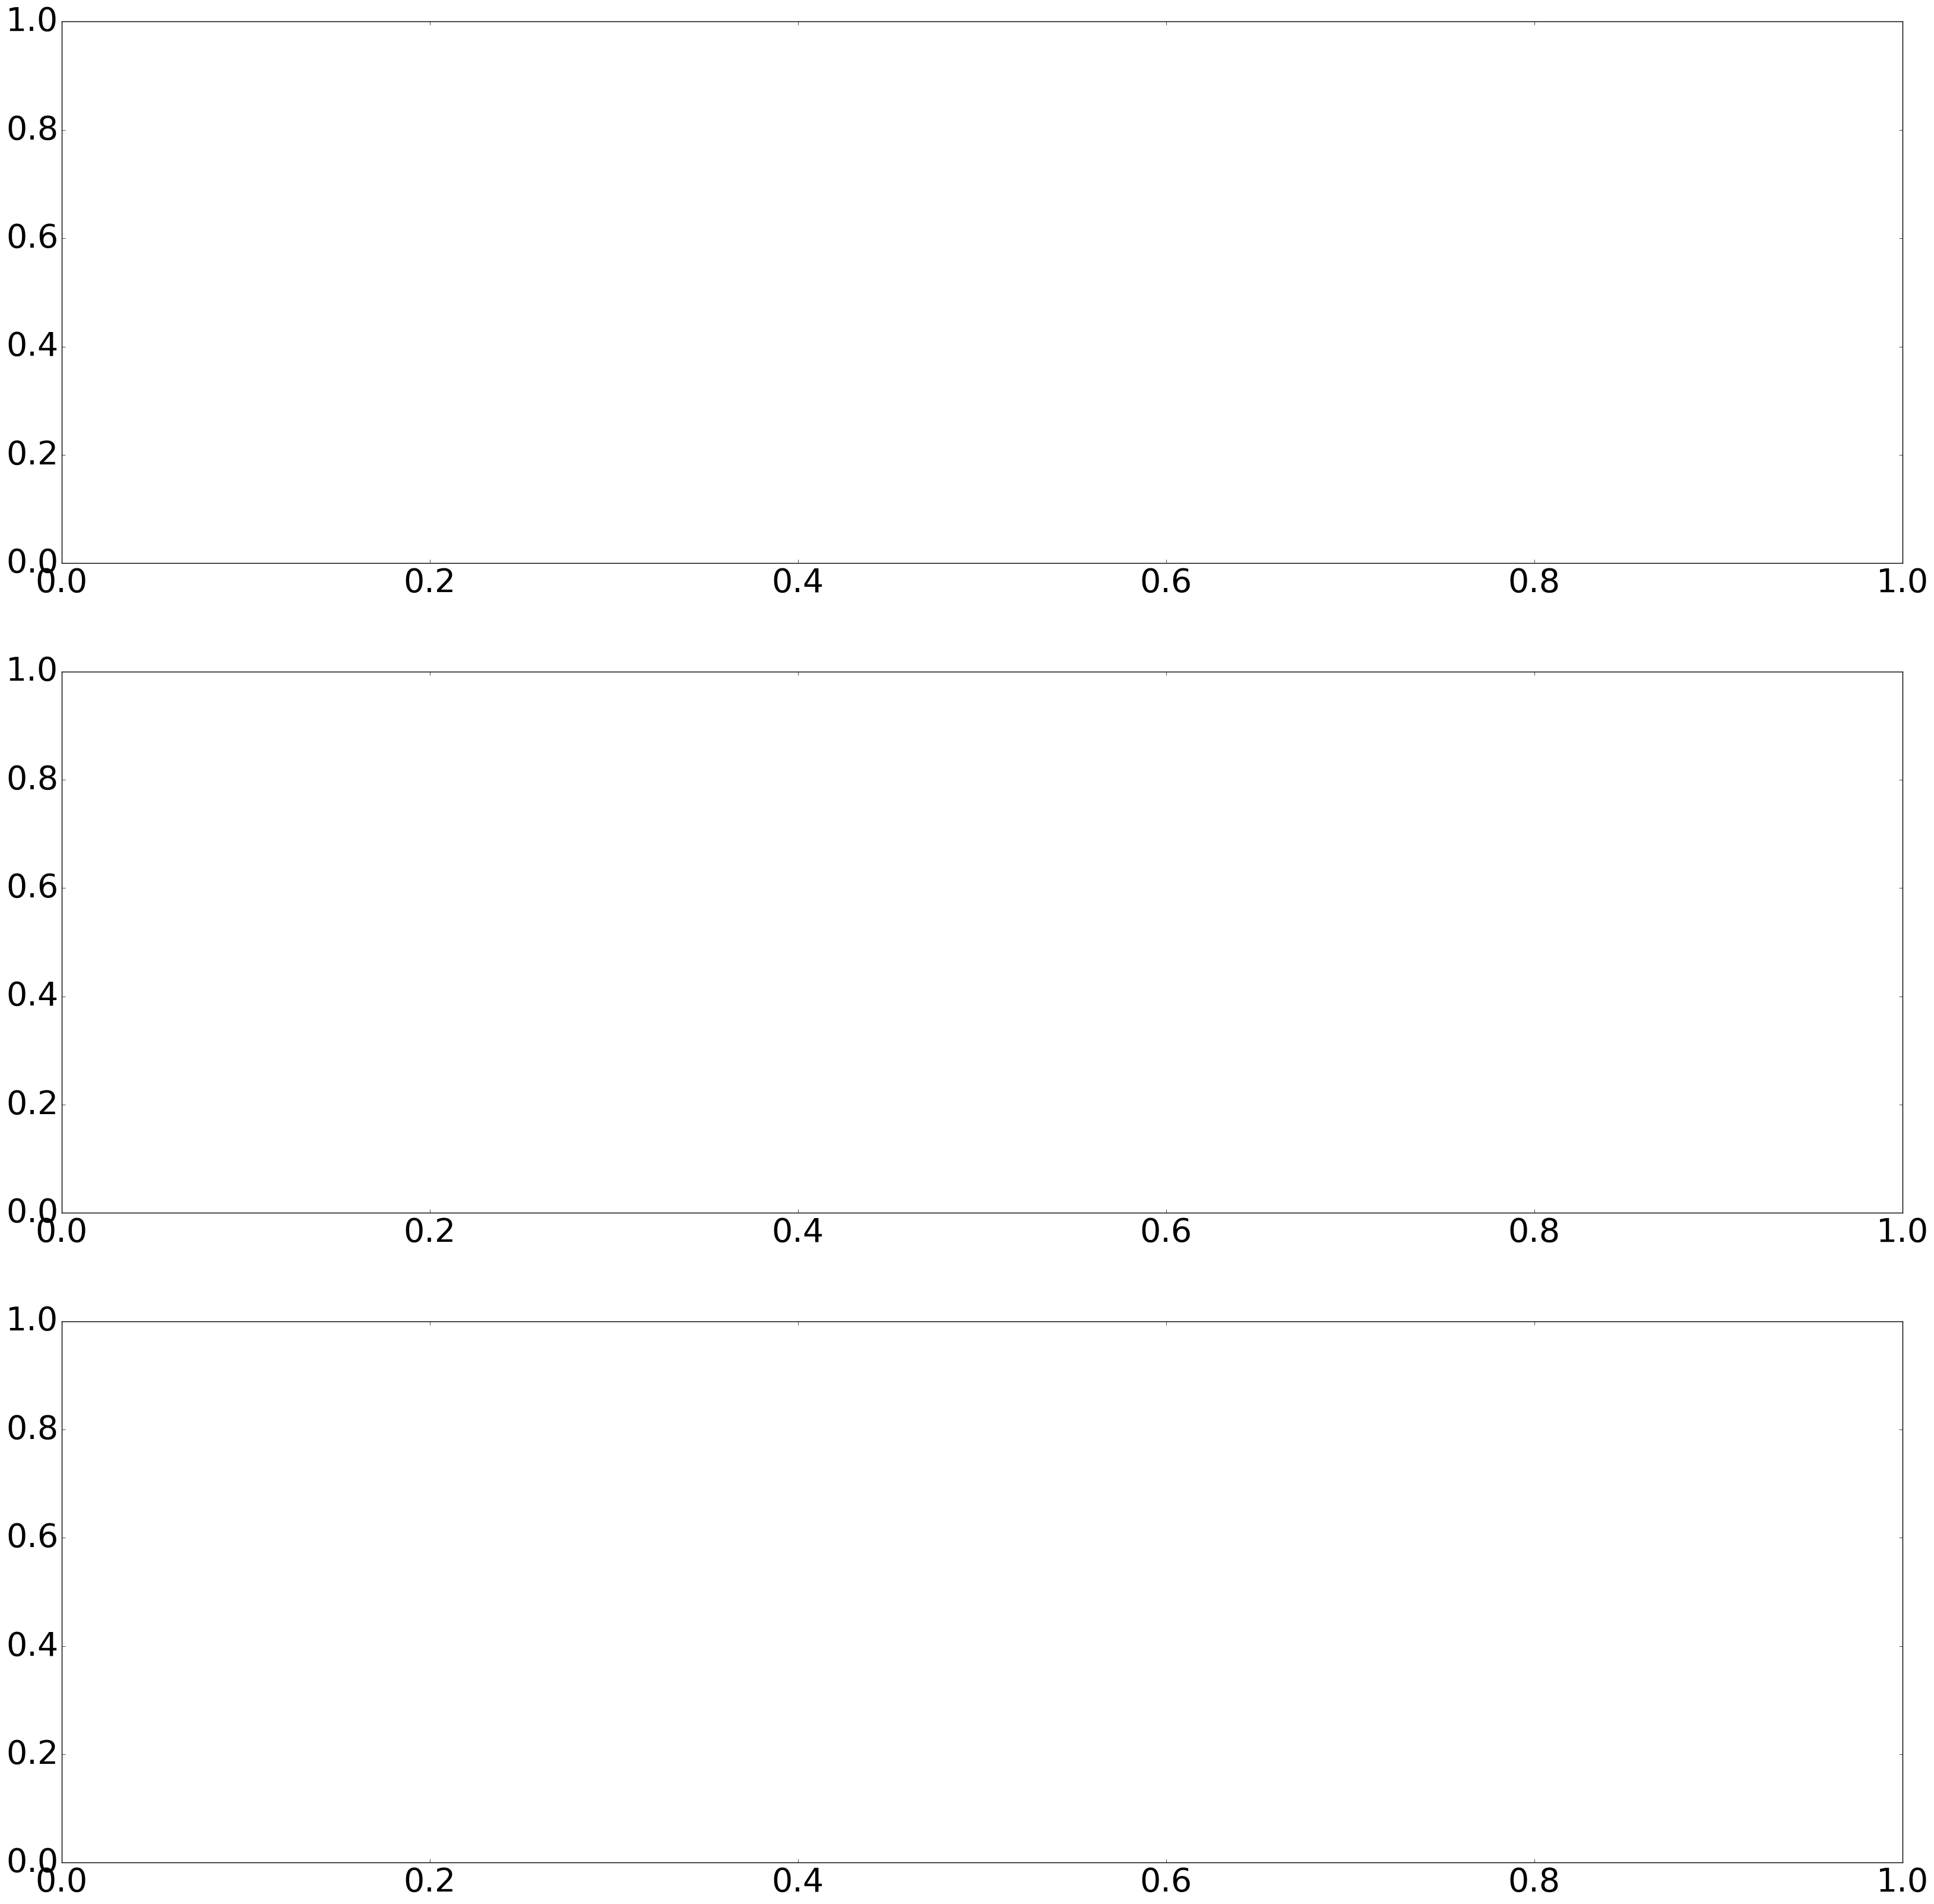

In [3]:
# fig mesh structure/constants

nplots = len(plots)

LIN = nplots // 2 + nplots % 2


fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

canvas = fc(fig)

#         Station 15: Lat = 49.130412, Lon = -123.3114
#         Station 16: Lat = 49.1214, Lon = -123.317415

S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)




bathy = nc.Dataset("/home/gsgarbi/analysis-giorgio/sequential/bathy_meter_SalishSea2.nc")
model_lats = bathy.variables['nav_lat'][:]
model_lons = bathy.variables['nav_lon'][:]
depth = bathy.variables['Bathymetry'][:]



#End of spit
late = 49.205
lone = -123.26
#Further up spit
lats = 49.214
lons = -123.22


# In[ ]:

dx = 1.2
lat = late + dx * (late - lats)
lon = lone + dx * (lone - lons)
y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)
#print(depth[y, x])
#print(y, x)
#print('And in Fortran for ariane', y + 1, x + 1)
# point I used
outy = y - 1
outx = x - 1

deep = 110
shallow = 35

time0 = 0
time14 = 14

new_limx = (-124.5,-122.5)

new_limy = (48.7,49.5)



original_limx = (-123.5, -123.1)

original_ticksx = (-123.5, -123.3, -123.1)

original_limy = (49.05, 49.35)

original_ticksy = (49.1, 49.2, 49.3)

new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])

new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                   



#norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
norm_p = mpl_colors.Normalize(vmin=shallow, vmax=deep)
cmap_p = plt.cm.plasma_r

norm_w = None
cmap_w = "winter_r"

norm_t = mpl_colors.Normalize(vmin=time0, vmax=time14)
cmap_t = plt.cm.plasma_r


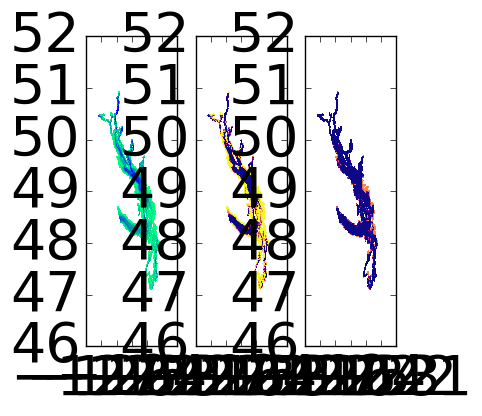

In [4]:
#Meshes


meshes = plt.figure(figsize=(4,4))

ax_w = meshes.add_subplot(131)

ax_p = meshes.add_subplot(132)

ax_t = meshes.add_subplot(133)






mesh_w = ax_w.pcolormesh(model_lons, model_lats, depth, cmap=cmap_w, norm = norm_w)
        
mesh_p = ax_p.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_p)

mesh_t = ax_t.pcolormesh(model_lons, model_lats, depth, cmap=cmap_p, norm = norm_t)

In [5]:
# what to plot, how many plots, how many particles, for how long?
# how many columns?
# create trajectories[], create axes parameters

LIN = nplots // 2 + nplots % 2

trajectories = []

initial_positions = []


trajectories1 =[]
init1 = []
for num in range(1,nplots+1):
    trajectories1.append(np.loadtxt(directory+"run%s/traj.txt"%num, delimiter = ' '))
    init1.append(np.loadtxt(directory+"run%s/initial_positions.txt"%num))

l = 0
c= COL
for lin in range(LIN):
    trajectories.append(trajectories1[l:c])
    initial_positions.append(init1[l:c])
    l += 2
    c += 2

    
PARTICLES = range(1,len(init1[0])+1)

titles = []

for j in range(LIN):
    for k in range (COL):
        initial_times = []
        pos = COL*j+k

        
        for i in initial_positions[j][k]:
            initial_times.append(int(i[3]))
            
        
        first_time = initial_times[0]
        
        last_time = initial_times[-1]
        first_day = plots[pos]
        
        title = "INITIAL DATE: %s; " %plots[pos] + "INITIAL TIMES (24h format): %s - %s"%(first_time, last_time) + "\n" + "RUN LENGTH: %s; INITIAL DEPTHS(m): %s" %(length, initial_depths)
    
        titles.append(title) 

for x in titles:
    print (x+'/n')
            



#results: PARTCLES, title                       

INITIAL DATE: JUL 19; INITIAL TIMES (24h format): 1 - 12
RUN LENGTH: 4 days; INITIAL DEPTHS(m): 45, 59, 77/n
INITIAL DATE: JUL 26; INITIAL TIMES (24h format): 1 - 12
RUN LENGTH: 4 days; INITIAL DEPTHS(m): 45, 59, 77/n
INITIAL DATE: AUG 2; INITIAL TIMES (24h format): 1 - 12
RUN LENGTH: 4 days; INITIAL DEPTHS(m): 45, 59, 77/n


In [6]:
# fig = plt.figure(figsize = (size, size))


# top = 0.95

# vert = 0.07

# rig = 0.1

# hei = 0.03

# wid = 1.5



# part = fig.add_axes((rig,top,wid,hei))
# norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
# cb1 = mpl_colorbar.ColorbarBase(part, cmap=cmap, norm=norm,  orientation = "horizontal")
# cb1.set_label('Particle Depth (m)', fontsize = 50)

# particlecb = fig

# fig = plt.figure(figsize = (size, size))

# water = fig.add_axes((rig,top,wid,hei))
# cb_mesh = fig.colorbar(mesh, water, orientation = "horizontal" )
# cb_mesh.set_label("Water Depth (m)", fontsize = 50)

# watercb = fig

3 1


IndexError: too many indices for array

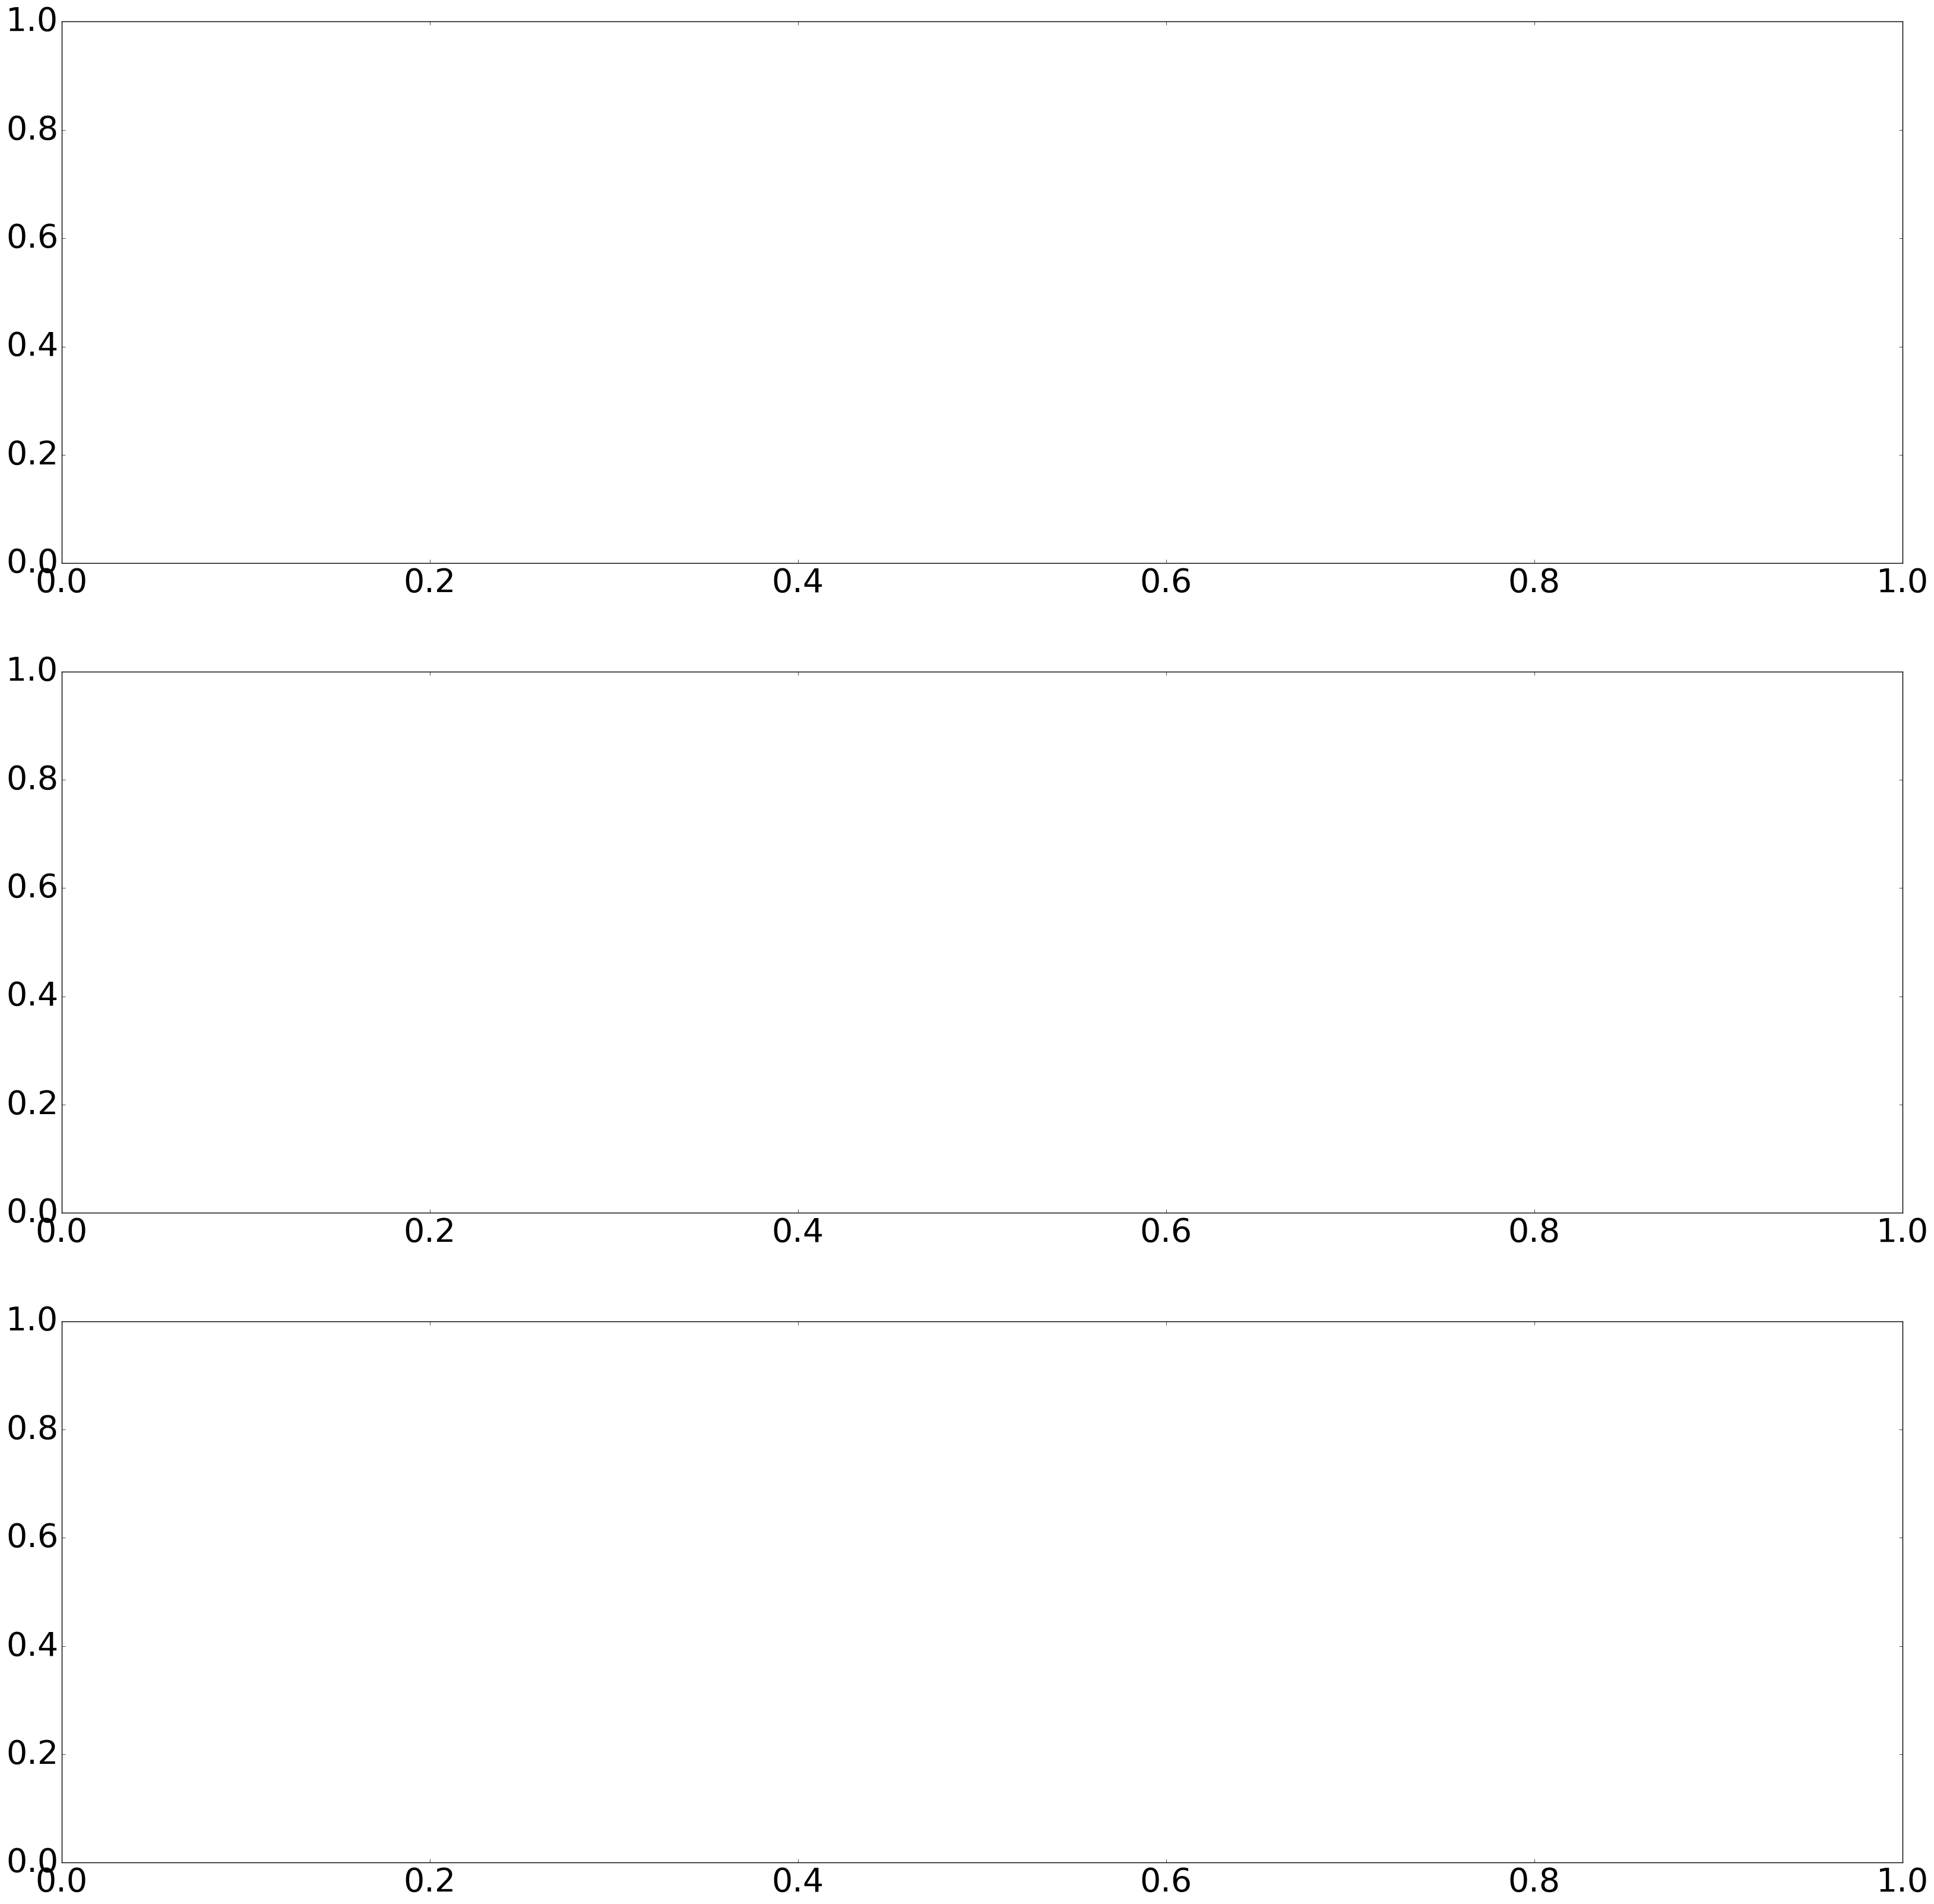

In [8]:
fig, axs = plt.subplots(LIN,COL, figsize = (size,size))

print (LIN,COL)

#axs=np.reshape(axs,(1,1))

for j in range(LIN):
    for k in range (COL):
        
        divider = make_axes_locatable(axs[j,k])
        
        cax_w = divider.append_axes("right", size="5%", pad=0.05)
        
        cax_p = divider.append_axes("bottom", size="5%", pad=1.6)
        
        
        cb_w = fig.colorbar(mesh_w, cax = cax_w)
        
        cb_p = fig.colorbar(mesh_p, cax = cax_p, orientation = "horizontal")
        
        cb_w.set_label("Water Depth (m)")
        
        cb_p.set_label("Particle Depth (m)")




        mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)


        
        

        pos = COL*j+k
        
        axs[j,k].set_title(titles[pos], fontsize = tfs)

        


        
#         if k == 0:
#             norm = mpl_colors.Normalize(vmin=deep, vmax=shallow)
#             cb1 = fig.colorbar(mesh2, ax = axs[j,k], cmap=plt.cm.plasma_r, norm=norm, pad = pad)
#             cb1.set_label('Particle Depth (m)')
        

#         if k == 1:
#             cb_mesh = fig.colorbar(mesh, ax=axs[j,k], pad = pad)
#             cb_mesh.set_label("Water Depth (m)")

            
        
        

        

        axs[j,k].set_xlim(new_limx)
        axs[j,k].set_xticks(new_ticksx)
        axs[j,k].set_xticklabels(('%s W' %-new_limx[0], '%s W' %-round(float(sum(new_limx))/2,2), '%s W' %-new_limx[1]))
        axs[j,k].set_xlabel('Longitude')
        
        axs[j,k].set_ylim(new_limy)
        axs[j,k].set_yticks(new_ticksy)
        axs[j,k].set_yticklabels(('%s N' %new_limy[0], '%s N' %round(float(sum(new_limy))/2,1), '%s N' %new_limy[1]))
        axs[j,k].set_ylabel('Latitude')
        
        
        #Iona
        axs[j,k].plot(model_lons[outy, outx], model_lats[outy, outx], 'wo')
        #New Stations

        axs[j,k].plot(S15[0],S15[1], 'wo')
        
        axs[j,k].plot(S16[0],S16[1], 'wo')
        
        axs[j,k].annotate(
        "Iona outfall",
        xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        axs[j,k].annotate(
        "Station 15",
        xy=(S15[0],S15[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='bottom',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

        axs[j,k].annotate(
        "Station 16",
        xy=(S16[0],S16[1]), xytext=(50, 10),
        textcoords='offset points', ha='left', va='top',
        #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    


plt.tight_layout()



In [7]:
for j in range(LIN):
    for k in range (COL):

        for i in range(int(len(trajectories[j][k])*ratio)):
            if trajectories[j][k][i][0] in PARTICLES:
                scaled_z = 1-(deep + trajectories[j][k][i][3]) / (deep - shallow)
                cmap = plt.cm.plasma_r
                color = cmap(scaled_z)
                axs[j,k].scatter(trajectories[j][k][i][1] , trajectories[j][k][i][2] , c=color, edgecolor = "none")
plt.show()



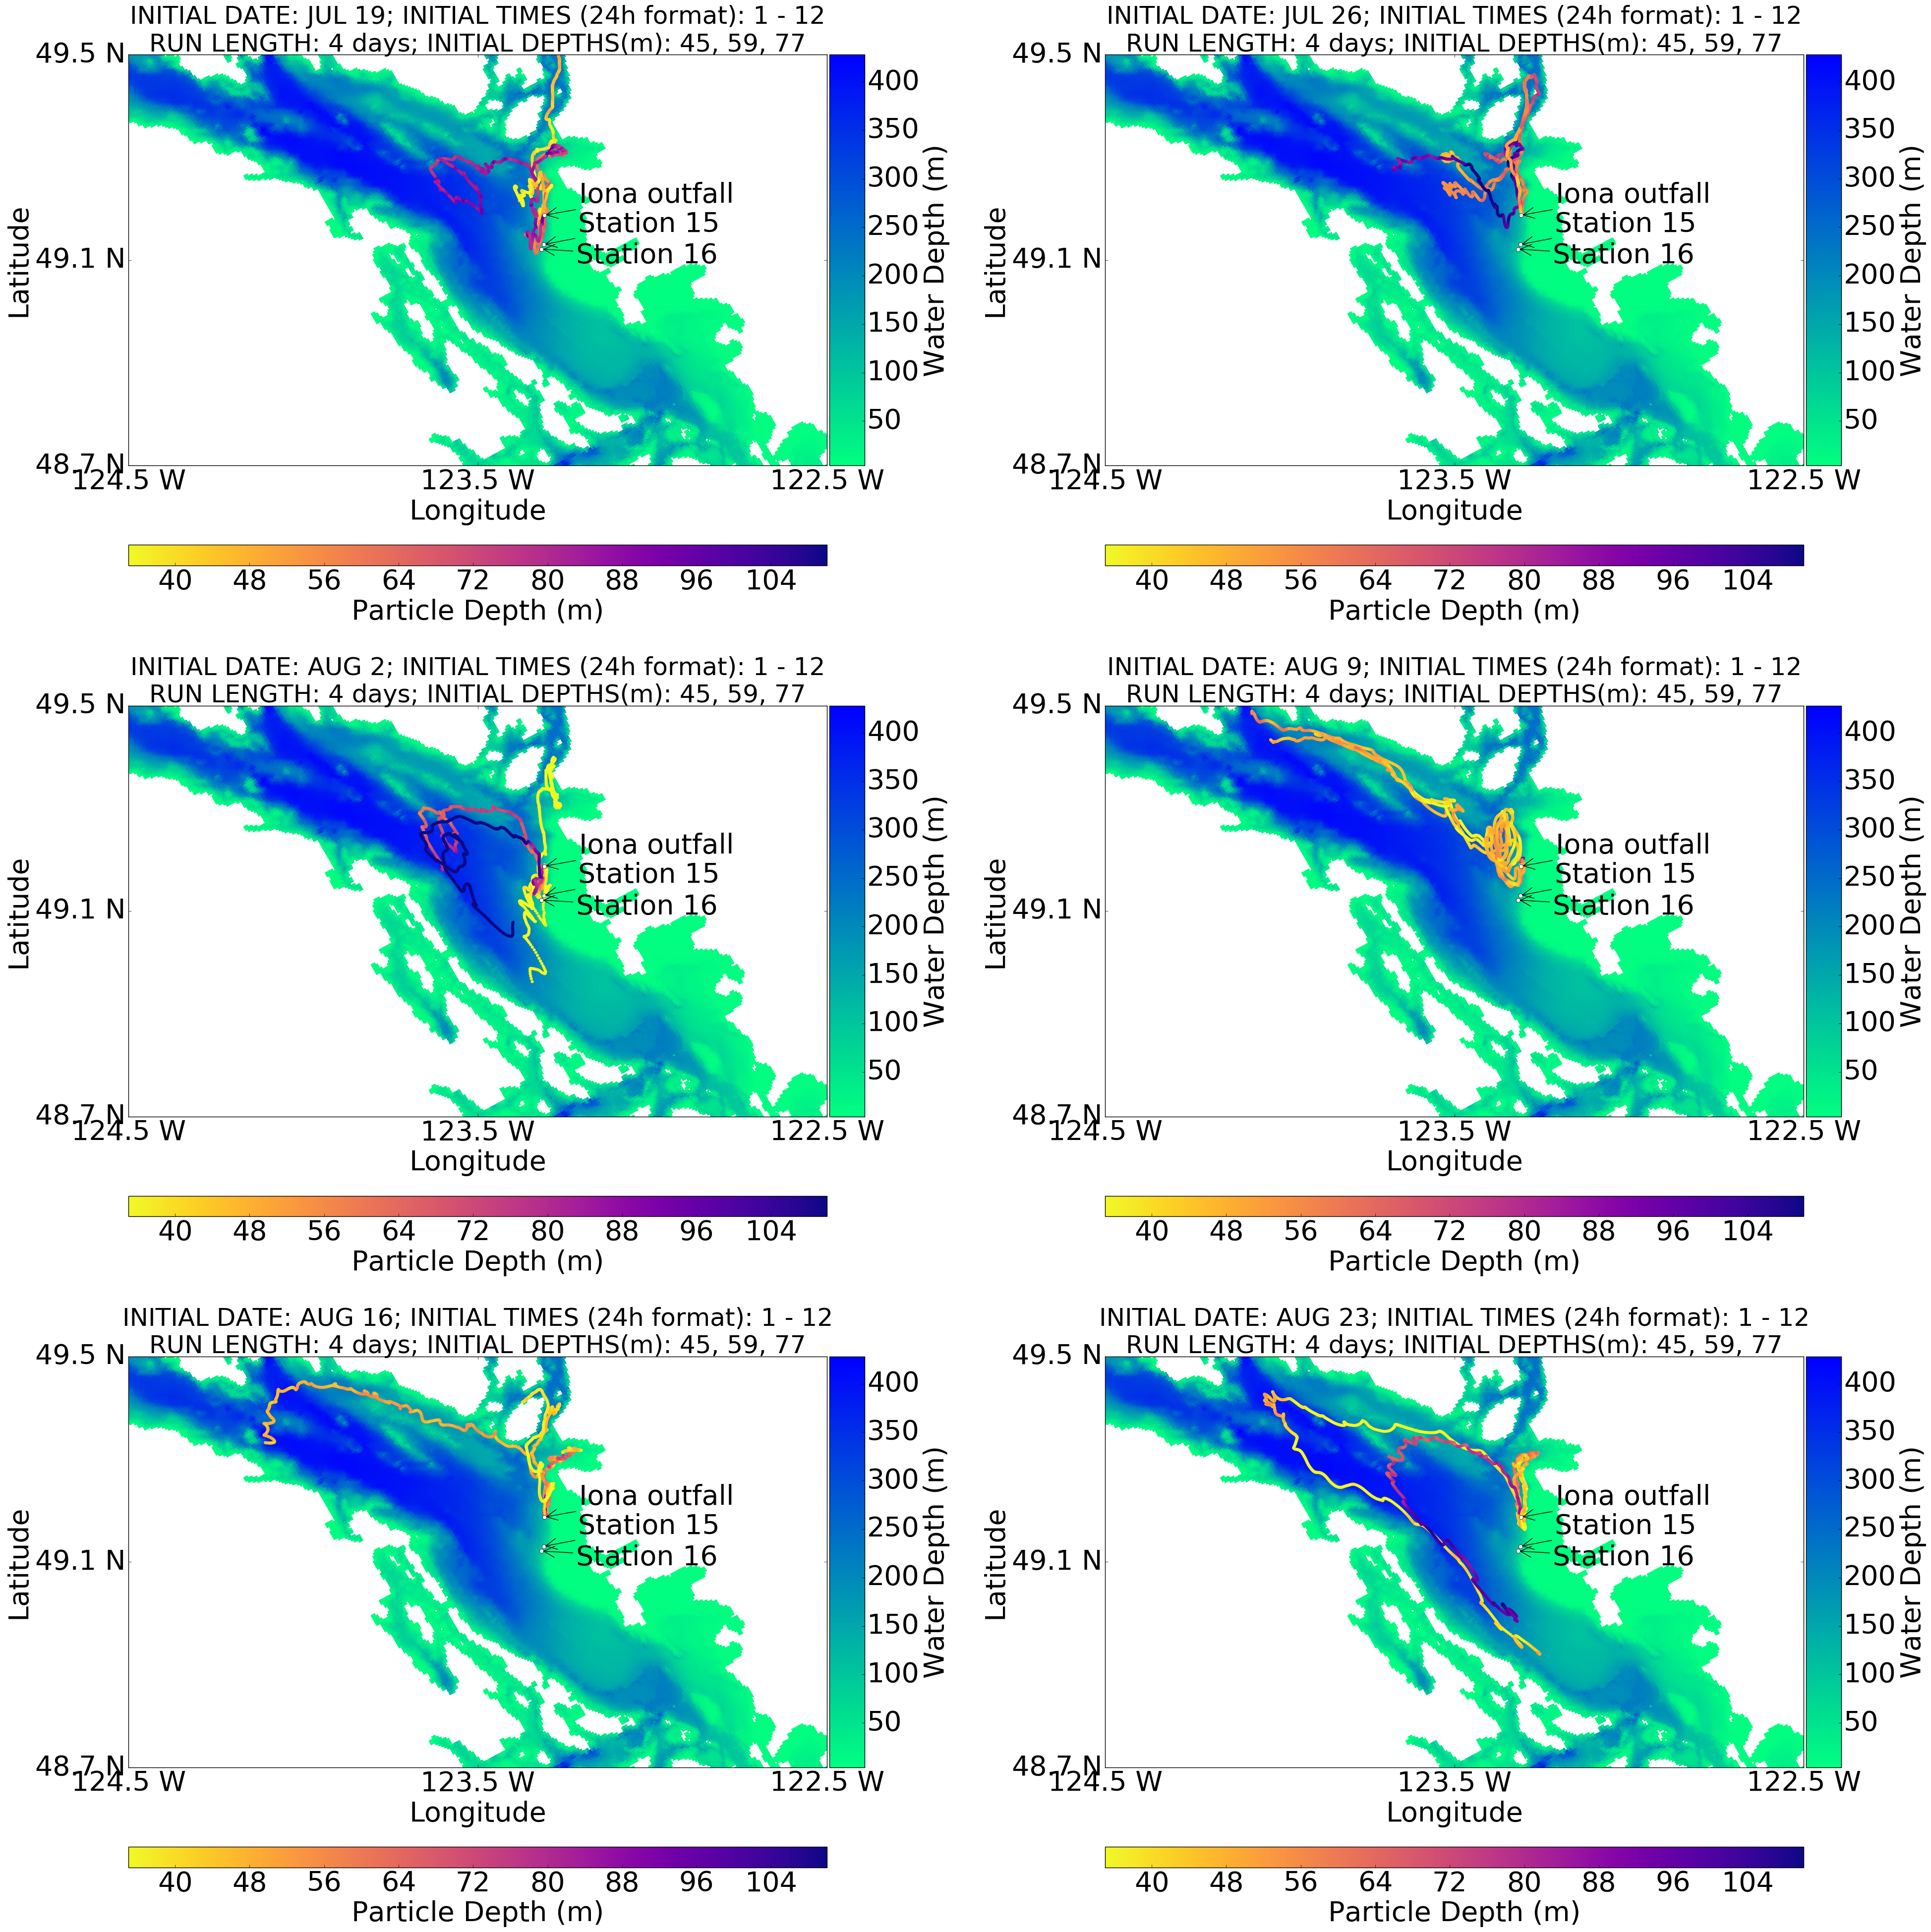

In [8]:
fig

In [10]:
fig.savefig("/home/gsgarbi/Desktop/week3.png")